In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from utide._ut_constants import ut_constants as utide
import os
from utils import *
import pandas as pd
import cartopy.feature as cfeature
from scipy.ndimage import gaussian_filter
from palette import * 
from glob import iglob
from netCDF4 import Dataset
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# useful variables
j=np.complex(0,1)
cpd=2.*np.pi/86400. # from cpd to radian/s
crs = ccrs.PlateCarree() # cartopy


#datadir = './'
datadir = '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient'
graphdir = '/home3/homedir7/perso/cgonzale/IWAVE/figures/'
# tmp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

palette = '/home3/homedir7/perso/cgonzale/IWAVE/script/palette/medspiration.rgb'
csst = getColorMap( rgbFile = palette )

In [2]:
#Find available files
rootdir_glob = datadir+ '**/*'
file_list = [f for f in iglob(rootdir_glob, recursive=True) if os.path.isfile(f)]
print(file_list)

['/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_03.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_04.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_08.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_05.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_11.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_09.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_01.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_07.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_02.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_12.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gr

In [3]:
#order file_list chronologically (from January to December)
file_list.sort()
print(file_list)

['/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_01.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_02.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_03.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_04.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_05.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_06.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_07.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_08.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_09.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_10.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gr

In [4]:
#read and merge all files
ds = [xr.open_dataset(f) for f in file_list]

In [5]:
dum =[ds[m].month for m in range(len(file_list))]

In [6]:
print(dum)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [7]:
print(ds[0])

<xarray.Dataset>
Dimensions:                 (lat: 2048, lon: 4096)
Coordinates:
  * lon                     (lon) float32 -179.95605 -179.86816 -179.78027 ...
  * lat                     (lat) float32 89.956055 89.868164 89.78027 ...
Data variables:
    clim_maxi_sst_gradient  (lat, lon) float64 ...
    clim_src                (lat, lon) float64 ...
Attributes:
    title:    Max Frontal Gradient from URI Pathfinder 9 km frontal database ...
    month:    01


In [8]:
file_list

['/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_01.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_02.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_03.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_04.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_05.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_06.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_07.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_08.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_09.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_10.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_m

In [9]:
#fig = plt.figure(figsize=(36, 20))
def make_cartopy(projection=ccrs.PlateCarree(), fig=plt.figure(), resolution='50m',nfig=1,Month_text='January'):
    ax = fig.add_subplot(4,3,nfig,projection=projection)
    ax.coastlines(resolution=resolution, color='k')
    ax.add_feature(cfeature.LAND, facecolor = '0.75')
    #ax.gridlines(draw_labels = True)
    ax.set_title(Month_text)
    gl = ax.gridlines(crs=projection, draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Only PlateCarree and Mercator plots are currently supported.
    return ax

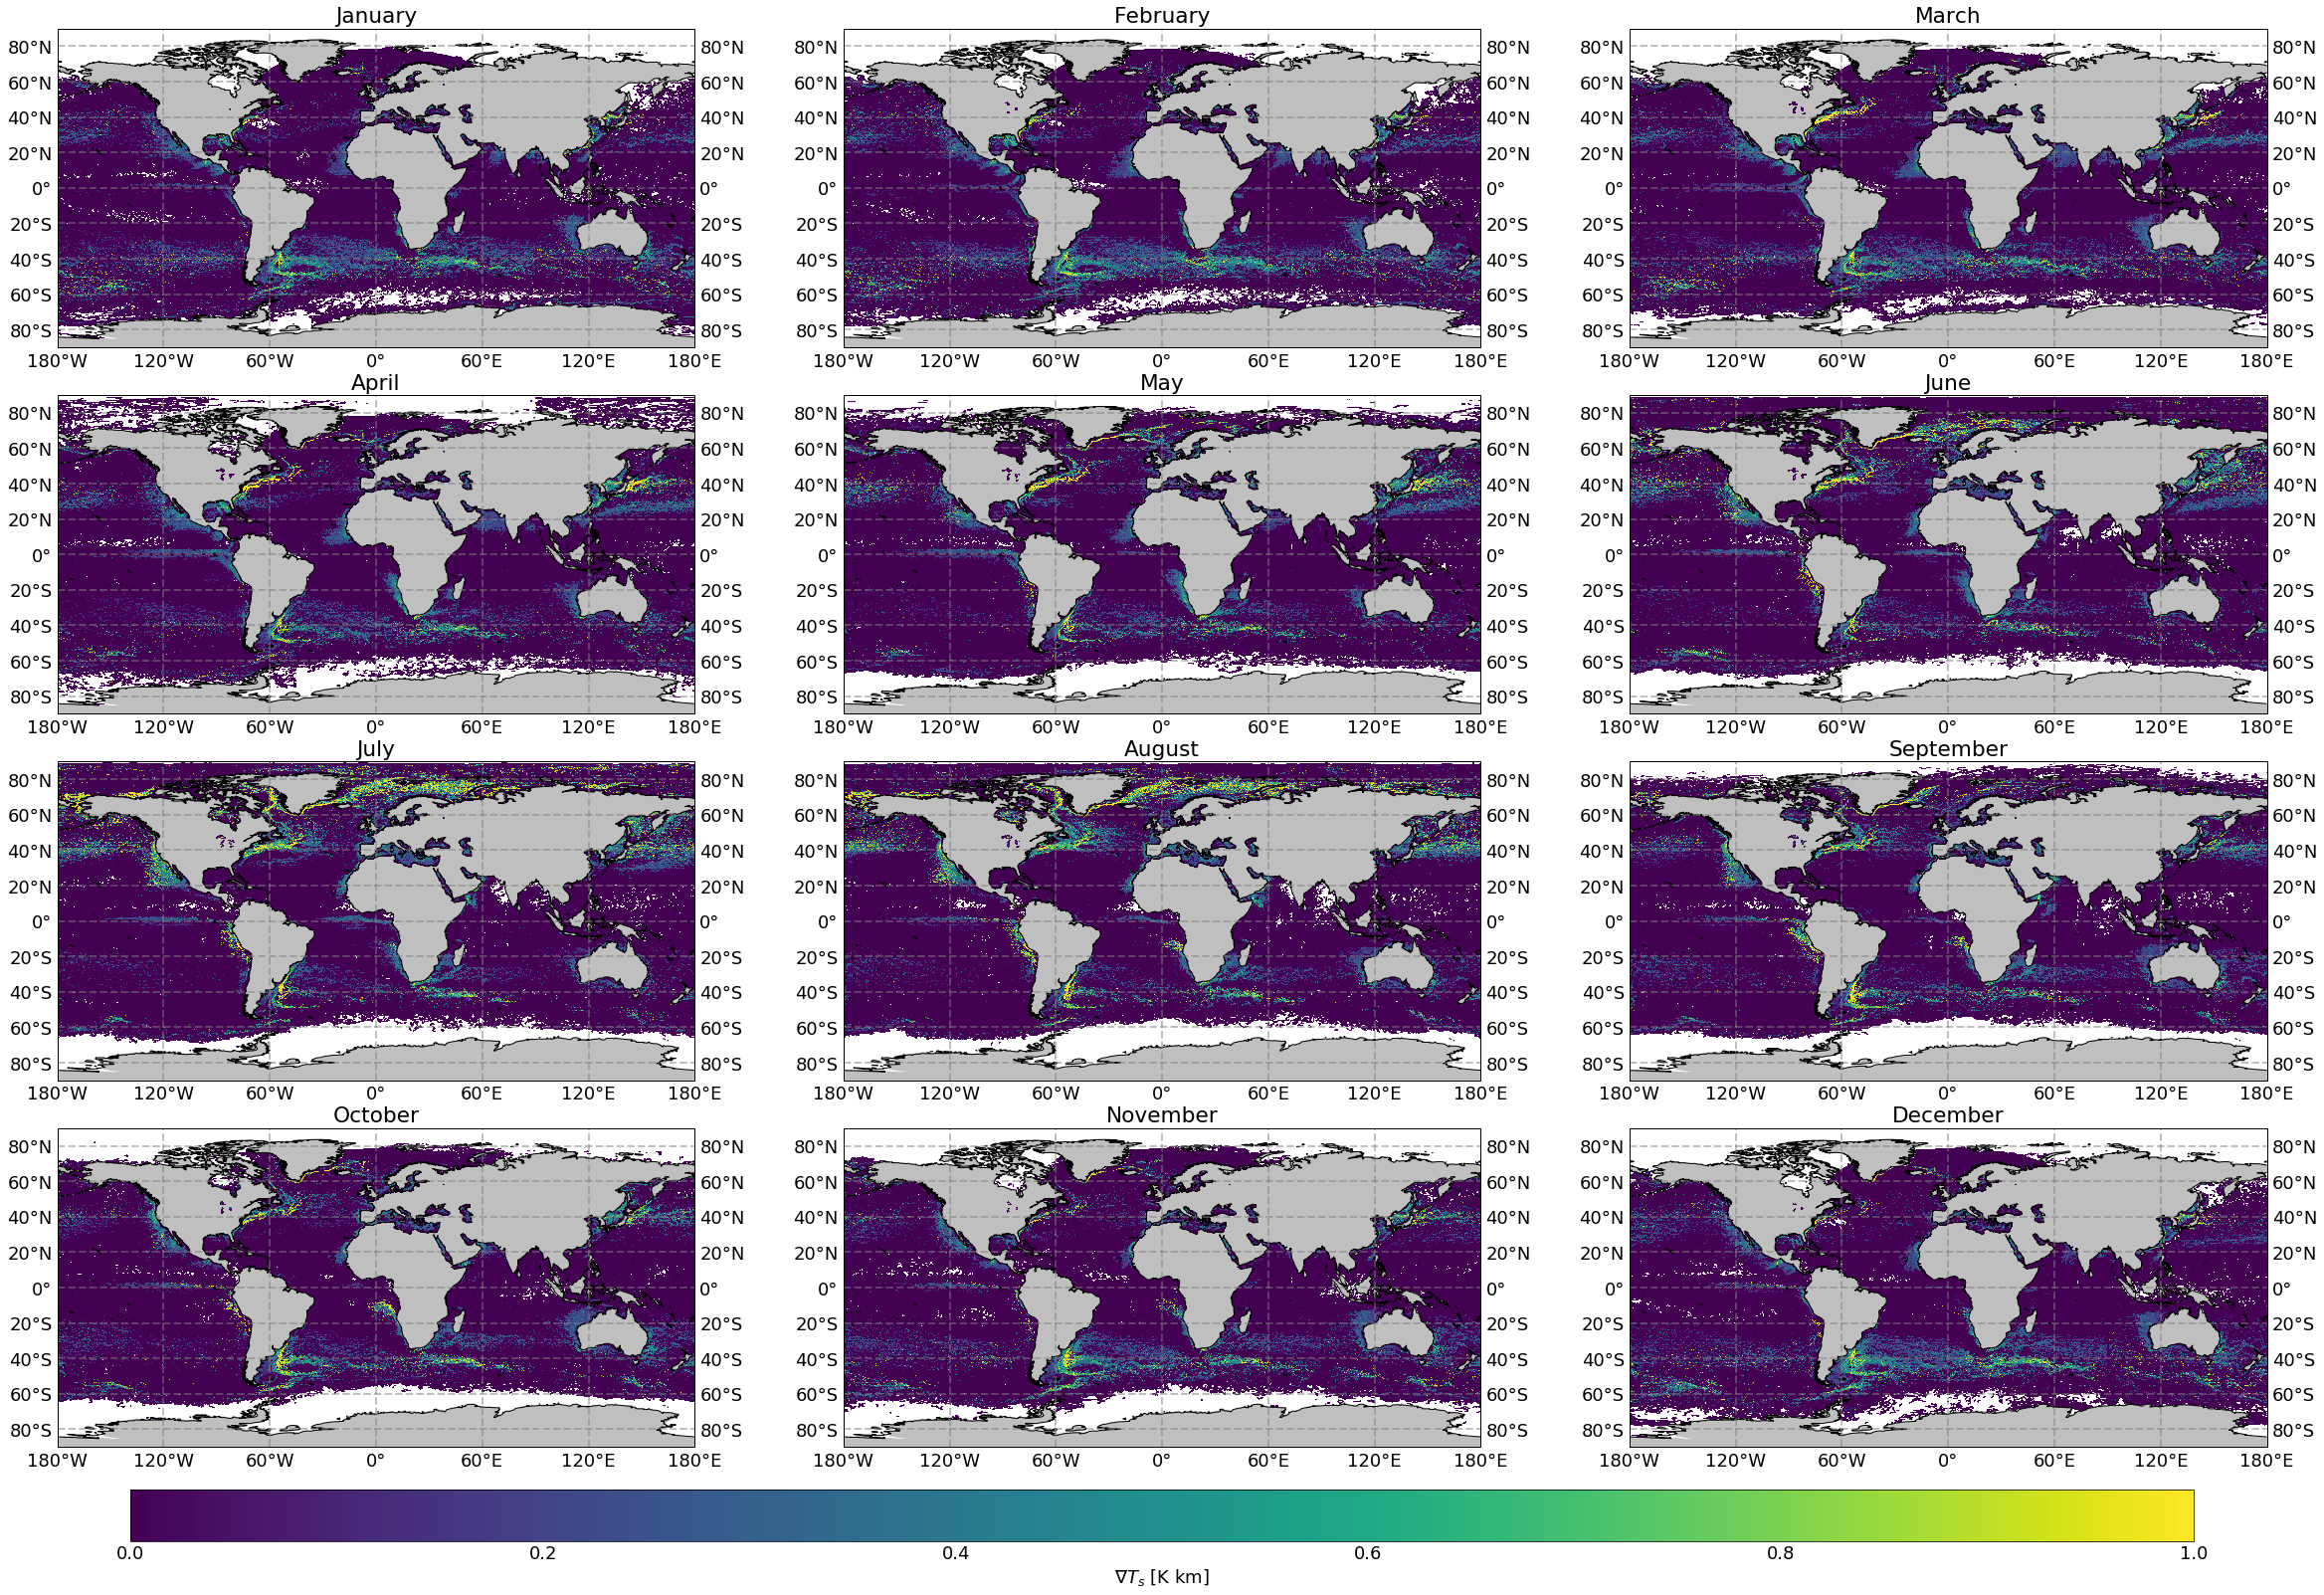

In [10]:
matplotlib.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(36, 24))
vmin=0
vmax=1
str_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
for f in file_list:
    # load NetCDF 
    name_file = f.rsplit(os.sep,1)[1].rsplit('.',2)[0]
    month=int(name_file.rsplit('_',1)[1])
    ncfile=Dataset(f,'r')
    lat = ncfile.variables['lat'][:]
    lon = ncfile.variables['lon'][:]
    toplt = ncfile.variables['clim_maxi_sst_gradient'][:]
    ncfile.close()
    if(month==10):
        plt1_ax = plt.gca()
    if(month==12):
        plt2_ax = plt.gca()
    ax = make_cartopy(projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=month,Month_text=str_month[month-1])
    cs = ax.pcolormesh(lon,lat,toplt,vmin=vmin, vmax=vmax)



# Add axes to the figure, to place the colour bar
colorbar_axes = fig.add_axes([0.1, 0.07, 0.8, 0.03])

# Add the colour bar
cbar = plt.colorbar(cs, colorbar_axes, orientation='horizontal')

# Label the colour bar and add ticks
cbar.set_label(r'$\nabla T_s$ [K km]')
cbar.ax.tick_params(length=0)
plt.subplots_adjust(left=0.05,right=0.95,hspace=0.15,wspace=0.05,top=0.95)
plt.savefig(graphdir+'Atlas_SST_gradient.png')
